# Plot Experiment (single)

## Importing section

In [51]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import os

## Load data

In [116]:
loading_csv_path = "results/ba_ptree/edge/rwse_default/final/rank1_2b76b26e.csv"
figure_path = os.path.join(loading_csv_path.split(".csv")[0] + ".png")

In [117]:
# load csv
df = pd.read_csv(loading_csv_path)
display(df)

,train_mae,train_r2,train_spearmanr,train_mse,train_rmse,train_mean_loss,train_sum_loss,val_mae,val_r2,val_spearmanr,...,time_total_s,pid,hostname,node_ip,time_since_restore,iterations_since_restore,config/model/hidden_dimension,config/model/modules/1/parameter/dropout,config/model/modules/1/times,config/optimizer/base_learning_rate
0,5.72100,-37.80068,0.33006,34.442951,5.86881,5.720993,8644.420707,5.69014,-36.30616,0.32538,...,4563.469963,1864496,vader,131.130.125.97,4563.469963,1,256,0.0,10,0.0001
1,0.81927,-0.69436,0.54793,1.504070,1.22641,0.819228,1237.852884,0.50878,0.40727,0.75433,...,8989.792648,1864496,vader,131.130.125.97,8989.792648,2,256,0.0,10,0.0001
2,0.53916,0.40124,0.71522,0.531510,0.72905,0.539122,814.612925,0.46502,0.53944,0.77294,...,11815.484553,1864496,vader,131.130.125.97,11815.484553,3,256,0.0,10,0.0001
3,0.50094,0.48224,0.74861,0.459610,0.67795,0.500941,756.921975,0.43601,0.59135,0.81289,...,14352.944096,1864496,vader,131.130.125.97,14352.944096,4,256,0.0,10,0.0001
4,0.47862,0.52922,0.76853,0.417910,0.64646,0.478658,723.252794,0.44728,0.56010,0.78445,...,16875.616290,1864496,vader,131.130.125.97,16875.616290,5,256,0.0,10,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.13482,0.94940,0.97433,0.044920,0.21193,0.134818,203.709350,0.26742,0.82254,0.91886,...,212248.610413,1864496,vader,131.130.125.97,212248.610413,96,256,0.0,10,0.0001
96,0.13471,0.94943,0.97436,0.044890,0.21188,0.134707,203.542463,0.26667,0.82306,0.91896,...,213700.695429,1864496,vader,131.130.125.97,213700.695429,97,256,0.0,10,0.0001
97,0.13436,0.94954,0.97446,0.044790,0.21164,0.134352,203.005669,0.26681,0.82341,0.91928,...,215070.135414,1864496,vader,131.130.125.97,215070.135414,98,256,0.0,10,0.0001
98,0.13434,0.94941,0.97439,0.044910,0.21191,0.134358,203.015675,0.26630,0.82395,0.91927,...,216308.688868,1864496,vader,131.130.125.97,216308.688868,99,256,0.0,10,0.0001


## Define properties of graph

In [118]:
# data to plot
plot_left_axis = [
    'auc',
    'mae',
    'r2',
    'ranking_accuracy_0.3'
]
plot_right_axis = [
    'mean_loss',
]

In [119]:
# which data split modes to plot
plot_splits = [
    'train',
    # 'val',
    'test',
]

## Create plot

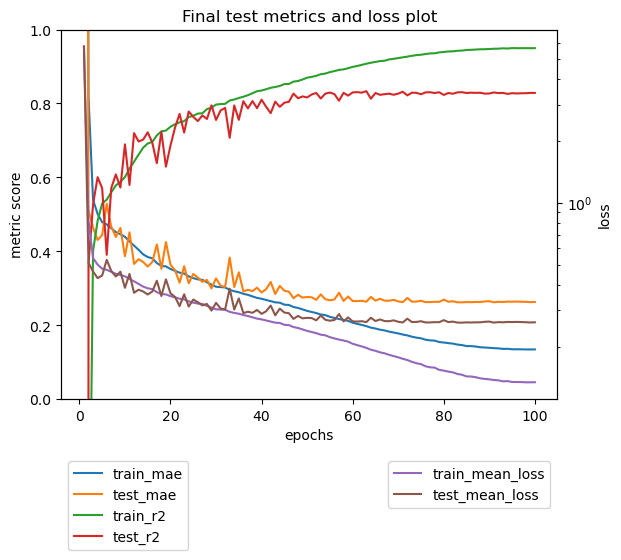

In [120]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

colors = iter(mcolors.TABLEAU_COLORS.values())

# plot left axis
for metric in plot_left_axis:
    # plot every specified split
    for split in plot_splits:
        # plot data on first axis
        if f"{split}_{metric}" in df:
            ax1.plot(df.index+1, df[f"{split}_{metric}"], label=f"{split}_{metric}", color=next(colors))

# plot right axis
for metric in plot_right_axis:
    # plot every specified split
    for split in plot_splits:
        # plot data on first axis
        ax2.plot(df.index+1, df[f"{split}_{metric}"], label=f"{split}_{metric}", color=next(colors))

# labels and legend
ax1.set_ylabel("metric score")
ax1.set_xlabel("epochs")
ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.15))
ax1.set_ylim(0,1)

ax2.set_ylabel("loss")
ax2.set_yscale('log')
ax2.legend(loc='upper right', bbox_to_anchor=(1, -0.15))
plt.title("Final test metrics and loss plot")

plt.show()